# Tests on GPy and Gaussian Process codes

Manually written algorithm to sample from a Gaussian process:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import GPy
import plotly 
plotly.tools.set_credentials_file(username='jsmarti', api_key='gwa649yekj')
%matplotlib inline

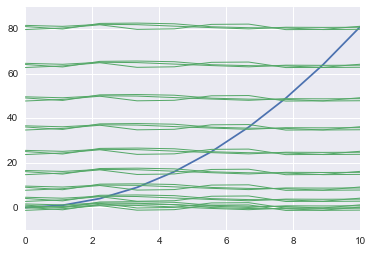

In [2]:
n = 10  #Number of inputs
dim = 1 #dimensions

#Random set of n inputs
x = np.linspace(0, 10, n)
x = x[:,None]

#Parameters of RBF kernel
lengthscale = .1
variance= 1.

#Covariance function
k = GPy.kern.RBF(dim, lengthscale = lengthscale, variance = variance)

#Covariance matrix
K = k.K(x)

#Mean function as zero for all inputs
mean = lambda(x): np.array([i**2 for i in range(x.shape[0])])
m = mean(x)

#Cholesky decomposition, using some stability parameters
nugget = 1e-6
C = K + nugget*np.eye(x.shape[0])
L = np.linalg.cholesky(C)

#For 4 samples:
n_samples = 3
fig, ax = plt.subplots()
ax.plot(x,m)
for i in xrange(n_samples):
    z = np.random.randn(x.shape[0],1) #Standard normal
    f = m + np.dot(L,z)
    ax.plot(x, f, color=sns.color_palette()[1], linewidth=1)

## Gaussian Process Regression
Tutorial on Gaussian process regressions from the GPy notebook

### 1-dimensional model
Considering the following inputs and outputs:

In [3]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

Variable $X$ is generated from a uniform distribution and $Y$ contains noise sampled from a standard normal distribution.

Now, we choose the RBF covariance kernel for the model:

In [4]:
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale = 1.)

The function used receives 3 parameters, the input dimension ($dim(X)$), the variance and the lengthscale.

The mean function is apparently set by default. Still, it doesn't matter. Now, we build the regression with the inputs and the kernel function

In [5]:
model = GPy.models.GPRegression(X,Y,k)

Lets analyze the model we have built

In [6]:
from IPython.display import display
display(model)

GP_regression.,Value,Constraint,Prior,Tied to
rbf.variance,1.0,+ve,,
rbf.lengthscale,1.0,+ve,,
Gaussian_noise.variance,1.0,+ve,,


The above regression correspond to a model befor optimization. Now, if we maximize the likelihood of the data we optimize the parameters through:

AttributeError: 'module' object has no attribute 'change_plotting_library'

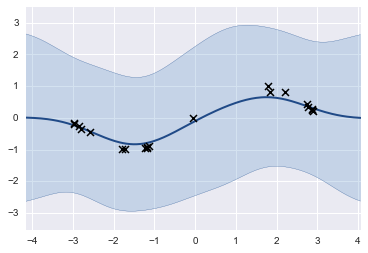

In [7]:
fig = model.plot()
GPy.plotting.change_plotting_library('plotly')
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

In [10]:
model.optimize(messages=True)

/Users/sebastian/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



Results of optimization can be improved through restarts of the optimization algorithm. The procedure consists of different random selections (sampled from a $N(0,1)$ distribution) for the parameters and optimizing at each point. The best solution is the selected. All of this is done through:

In [11]:
model.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -14.9375322746
Optimization restart 2/10, f = -14.9375322746
Optimization restart 3/10, f = -14.9375322745
Optimization restart 4/10, f = -14.9375322744
Optimization restart 5/10, f = -14.9375322746
Optimization restart 6/10, f = -14.9375322746
Optimization restart 7/10, f = -14.9375322746
Optimization restart 8/10, f = -14.9375322746
Optimization restart 9/10, f = -14.9375322746
Optimization restart 10/10, f = -14.9375322746


Now, the model parameters have changed:

GP_regression.,Value,Constraint,Prior,Tied to
rbf.variance,1.55965365137,+ve,,
rbf.lengthscale,2.07857135899,+ve,,
Gaussian_noise.variance,0.00264398840106,+ve,,


AttributeError: 'module' object has no attribute 'show'

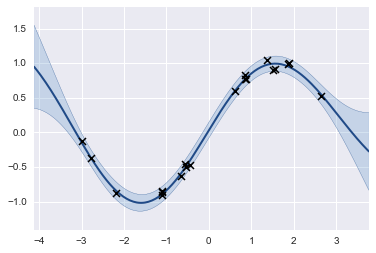

In [12]:
display(model)
fig = model.plot()
GPy.plotting.show(fig, filename = 'optimized regression')

## Other plotting settings

For GPy 0.9 and later we can plot the density of the GP regression by plotting more percentiles of the distribution color coded by their opacity

In [13]:
display(model)
fig = model.plot(plot_density=True)
GPy.plotting.show(fig, filename = 'GP regression density optimized')

GP_regression.,Value,Constraint,Prior,Tied to
rbf.variance,1.55965365137,+ve,,
rbf.lengthscale,2.07857135899,+ve,,
Gaussian_noise.variance,0.00264398840106,+ve,,


TypeError: plot() got an unexpected keyword argument 'plot_density'

## 2-dimesional example

For 2 dimensions, we have:

AttributeError: 'module' object has no attribute 'show'

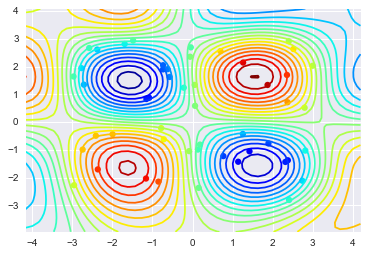

In [14]:
#Sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1])*np.sin(X[:,1:]) + np.random.randn(50,1)*0.05

#Define the kernel
k = GPy.kern.RBF(input_dim=2, variance = 1., lengthscale = 1.)

#Model
m = GPy.models.GPRegression(X,Y,k)

#Optimize and plot
m.optimize(messages = True, max_f_eval = 1000)
fig = m.plot()
display(GPy.plotting.show(fig, filename='2d regression'))
display(m)

## Plotting slices

Slices through 2-dimensional model can be plotted through fixed inputs as a set of slices:

In [15]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3,1,
                                               shared_xaxes = True,
                                               subplot_titles=('Slice at -1',
                                                              'Slice at 0',
                                                              'Slice at 1.5'))
for i, y in zip(range(3), slices):
    canvas = m.plot(figure = figure, fixed_inputs=[(1,y)], row = (i+1), plot_data = False)
GPy.plotting.show(canvas, filename='Slicing in 2D model')

AttributeError: 'module' object has no attribute 'plotting_library'